In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/users/nchib/desktop/RSE/RSE/data.csv', sep='\t')
print(df.shape)
df.head()

(47974, 14)


Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  gender  age  source country
0   3   3   1   4   3   4   3   2   3    3       1   40       1      US
1   4   4   1   3   1   3   3   2   3    2       1   36       1      US
2   2   3   2   3   3   3   2   3   3    3       2   22       1      US
3   4   3   2   3   2   3   2   3   3    3       1   31       1      US
4   4   4   1   4   1   4   4   1   1    1       1   30       1      EU

In [4]:
df.describe()

Q1            Q2            Q3            Q4            Q5  \
count  47974.000000  47974.000000  47974.000000  47974.000000  47974.000000   
mean       3.004940      3.087381      2.296265      2.908930      2.374870   
std        0.875506      0.824040      0.964855      0.828624      0.986816   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      2.000000      3.000000      2.000000   
75%        4.000000      4.000000      3.000000      3.000000      3.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

                 Q6            Q7            Q8            Q9           Q10  \
count  47974.000000  47974.000000  47974.000000  47974.000000  47974.000000   
mean       2.555634      2.435215      2.684788      2.773294      2.568996   
std        0.934463      0.946951      0.969243      1.007490      1.083867   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      2.000000      3.000000      3.000000      3.000000   
75%        3.000000      3.000000      3.000000      4.000000      3.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

             gender           age        source  
count  47974.000000  4.797400e+04  47974.000000  
mean       1.620711  4.479703e+04      1.541043  
std        0.526069  9.804533e+06      0.853600  
min        0.000000  0.000000e+00      1.000000  
25%        1.000000  1.800000e+01      1.000000  
50%        2.000000  2.200000e+01      1.000000  
75%        2.000000  3.200000e+01      2.000000  
max        3.000000  2.147484e+09      3.000000

In [5]:
df.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
gender     0
age        0
source     0
country    4
dtype: int64

In [6]:
df_score = df.copy()
reverse = ['Q3','Q5','Q8','Q9','Q10']
df_score[reverse] = df_score[reverse].applymap(lambda x: 5-x if x > 0 else x)
df_score.head()

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  gender  age  source country
0   3   3   4   4   2   4   3   3   2    2       1   40       1      US
1   4   4   4   3   4   3   3   3   2    3       1   36       1      US
2   2   3   3   3   2   3   2   2   2    2       2   22       1      US
3   4   3   3   3   3   3   2   2   2    2       1   31       1      US
4   4   4   4   4   4   4   4   4   4    4       1   30       1      EU

In [7]:
df_score['self_esteem_score'] = (df_score[df_score.columns[0:10]].sum(axis=1))/10
df_score.head()

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  gender  age  source country  \
0   3   3   4   4   2   4   3   3   2    2       1   40       1      US   
1   4   4   4   3   4   3   3   3   2    3       1   36       1      US   
2   2   3   3   3   2   3   2   2   2    2       2   22       1      US   
3   4   3   3   3   3   3   2   2   2    2       1   31       1      US   
4   4   4   4   4   4   4   4   4   4    4       1   30       1      EU   

   self_esteem_score  
0                3.0  
1                3.3  
2                2.4  
3                2.7  
4                4.0

In [8]:
df_score.drop(df_score[(df_score['self_esteem_score'] == 0) | (df_score['age'] > 100)].index, inplace = True)
df_score.describe()

Q1            Q2            Q3            Q4            Q5  \
count  47894.000000  47894.000000  47894.000000  47894.000000  47894.000000   
mean       3.007725      3.090241      2.682904      2.911659      2.607550   
std        0.871066      0.818939      0.966320      0.824165      0.986213   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      3.000000      3.000000      3.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

                 Q6            Q7            Q8            Q9           Q10  \
count  47894.000000  47894.000000  47894.000000  47894.000000  47894.000000   
mean       2.557982      2.437403      2.298868      2.203199      2.412265   
std        0.931524      0.944339      0.963363      0.998239      1.080236   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      2.000000      1.000000      2.000000   
50%        3.000000      2.000000      2.000000      2.000000      2.000000   
75%        3.000000      3.000000      3.000000      3.000000      3.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

             gender           age        source  self_esteem_score  
count  47894.000000  47894.000000  47894.000000       47894.000000  
mean       1.620892     26.287301      1.540506           2.620980  
std        0.525696     12.660127      0.853435           0.699453  
min        0.000000      0.000000      1.000000           0.100000  
25%        1.000000     18.000000      1.000000           2.100000  
50%        2.000000     22.000000      1.000000           2.600000  
75%        2.000000     32.000000      2.000000           3.100000  
max        3.000000    100.000000      3.000000           4.000000

In [11]:
df_final = df_score[['age','gender','country','self_esteem_score']].copy()
df_final.head()

age  gender country  self_esteem_score
0   40       1      US                3.0
1   36       1      US                3.3
2   22       2      US                2.4
3   31       1      US                2.7
4   30       1      EU                4.0

In [13]:
df_final.to_csv('/users/nchib/desktop/RSE/RSE/self_esteem_data.csv')

In [14]:
df_final['country'].value_counts()

US    22424
GB     6666
CA     2935
AU     2375
IN     1293
PH     1086
DE      646
SG      499
NZ      467
FI      429
IE      419
MY      391
SE      382
BR      376
NL      320
IT      313
PK      296
ZA      295
RO      286
FR      275
PL      236
NO      226
HK      209
ES      185
MX      183
DK      177
BE      172
ID      163
GR      159
PT      158
      ...  
AG        2
SZ        2
MP        2
YE        2
SC        1
MZ        1
ML        1
BQ        1
KZ        1
NC        1
CI        1
LR        1
AS        1
KN        1
UZ        1
LY        1
AI        1
KY        1
SN        1
SB        1
MC        1
RW        1
FK        1
FX        1
BT        1
TL        1
VC        1
GP        1
PG        1
SL        1
Name: country, Length: 175, dtype: int64

In [15]:
import seaborn as sns
sns.pairplot(df_final);

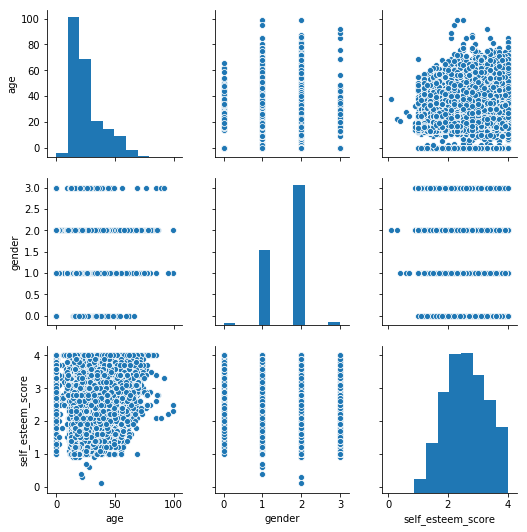

In [16]:
usa = df_final[df_final['country'] == 'US']
sns.pairplot(usa);

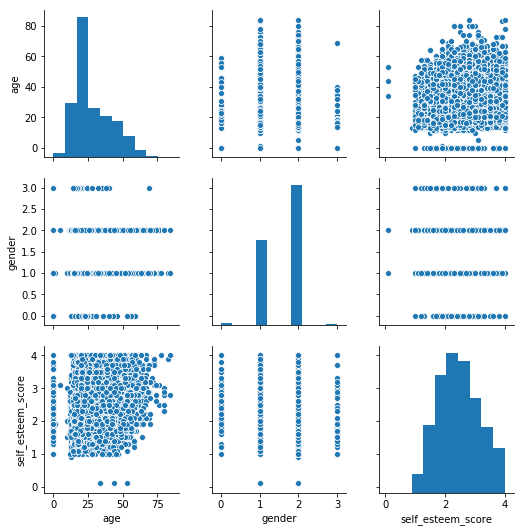

In [50]:
uk = df_final[df_final['country'] == 'GB']
sns.pairplot(uk);

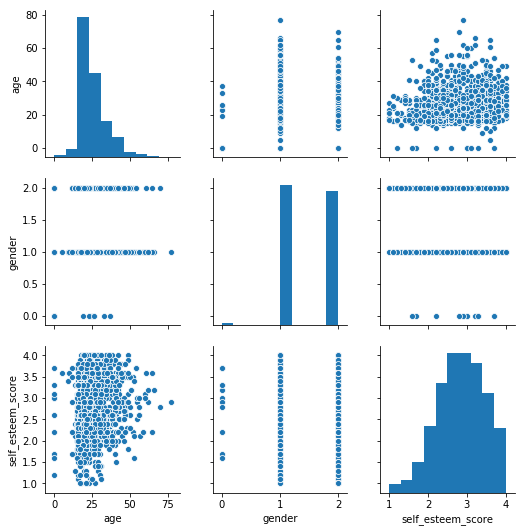

In [40]:
india = df_final[df_final['country'] == 'IN']
sns.pairplot(india);

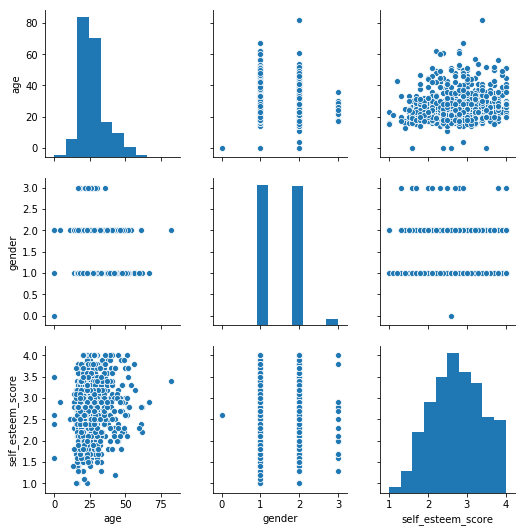

In [46]:
germany = df_final[df_final['country'] == 'DE']
sns.pairplot(germany);

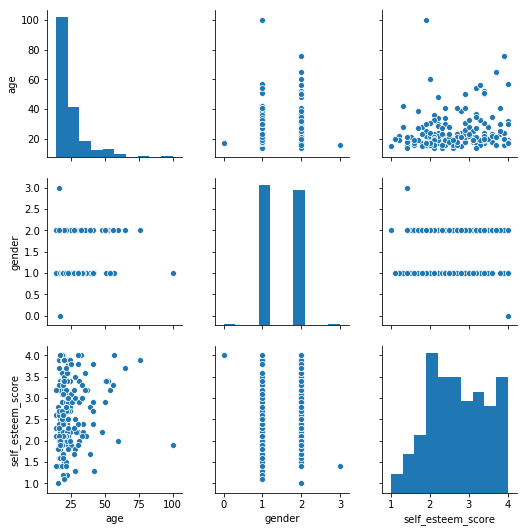

In [54]:
mexico = df_final[df_final['country'] == 'MX']
sns.pairplot(mexico);

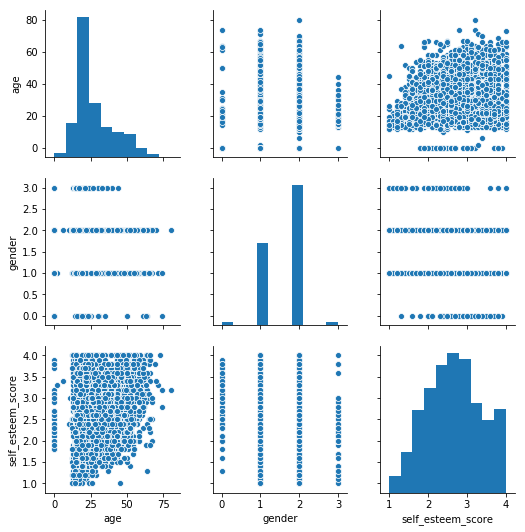

In [47]:
canada = df_final[df_final['country'] == 'CA']
sns.pairplot(canada);

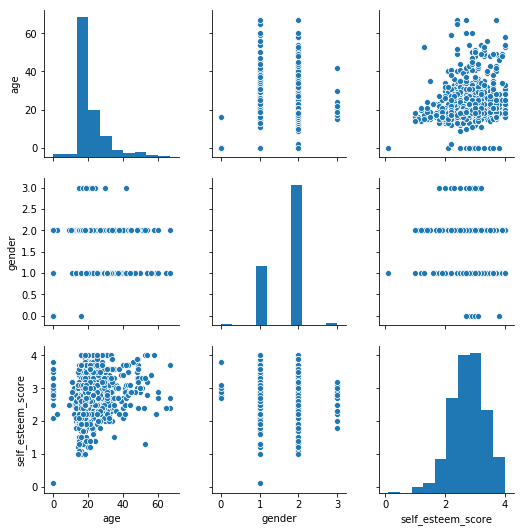

In [56]:
philippines = df_final[df_final['country'] == 'PH']
sns.pairplot(philippines);

In [48]:
df_final.groupby('country', as_index=False)['self_esteem_score'].mean().nlargest(20, 'self_esteem_score')

country  self_esteem_score
142      SB           3.800000
67       GY           3.700000
91       KY           3.700000
150      SN           3.700000
102      MC           3.600000
34       CI           3.500000
149      SL           3.500000
136      RE           3.350000
144      SD           3.314286
24       BO           3.300000
25       BQ           3.300000
3        AF           3.280000
154      SZ           3.250000
96       LR           3.200000
100      LY           3.200000
83       JM           3.191919
107      MM           3.185714
49       ET           3.154167
8        AN           3.120000
4        AG           3.100000

In [58]:
df_final.groupby('gender', as_index=False)['self_esteem_score'].mean()

gender  self_esteem_score
0       0           2.600658
1       1           2.721666
2       2           2.566671
3       3           2.245333

In [59]:
df_final.groupby('age', as_index=False)['self_esteem_score'].mean()

age  self_esteem_score
0     0           2.617260
1     1           2.700000
2     2           2.533333
3     3           2.400000
4     4           2.620000
5     5           2.883333
6     6           3.080000
7     7           3.275000
8     8           3.420000
9     9           2.966667
10   10           2.811111
11   11           2.866279
12   12           2.606383
13   13           2.342172
14   14           2.293906
15   15           2.352454
16   16           2.414940
17   17           2.444856
18   18           2.474855
19   19           2.518314
20   20           2.573908
21   21           2.643623
22   22           2.626638
23   23           2.669400
24   24           2.664523
25   25           2.678623
26   26           2.671758
27   27           2.672886
28   28           2.708388
29   29           2.747208
..  ...                ...
64   64           3.154545
65   65           3.076842
66   66           3.115789
67   67           2.977551
68   68           3.195238
69   69           3.079412
70   70           3.075676
71   71           3.200000
72   72           3.207692
73   73           3.492308
74   74           3.293333
75   75           3.375000
76   76           3.118182
77   77           3.028571
78   78           4.000000
79   80           2.820000
80   81           3.750000
81   82           3.700000
82   83           3.900000
83   84           3.400000
84   85           3.025000
85   86           2.800000
86   87           2.800000
87   89           2.100000
88   90           2.700000
89   92           2.900000
90   95           2.200000
91   98           2.500000
92   99           2.433333
93  100           1.950000

[94 rows x 2 columns]

In [49]:
usa.describe()

age        gender  self_esteem_score
count  22424.000000  22424.000000       22424.000000
mean      26.083393      1.653184           2.627319
std       13.381966      0.522081           0.713614
min        0.000000      0.000000           0.100000
25%       17.000000      1.000000           2.100000
50%       21.000000      2.000000           2.600000
75%       32.000000      2.000000           3.200000
max       99.000000      3.000000           4.000000

In [51]:
uk.describe()

age       gender  self_esteem_score
count  6666.000000  6666.000000        6666.000000
mean     28.170417     1.613561           2.481158
std      13.492842     0.520623           0.712201
min       0.000000     0.000000           0.100000
25%      18.000000     1.000000           2.000000
50%      23.000000     2.000000           2.400000
75%      37.000000     2.000000           3.000000
max      84.000000     3.000000           4.000000

In [52]:
canada.describe()

age       gender  self_esteem_score
count  2935.000000  2935.000000        2935.000000
mean     27.114821     1.627598           2.616457
std      13.170818     0.538866           0.707361
min       0.000000     0.000000           1.000000
25%      18.000000     1.000000           2.100000
50%      22.000000     2.000000           2.600000
75%      34.000000     2.000000           3.100000
max      80.000000     3.000000           4.000000

In [53]:
india.describe()

age       gender  self_esteem_score
count  1293.000000  1293.000000        1293.000000
mean     26.016241     1.477185           2.799768
std       9.231318     0.516430           0.617740
min       0.000000     0.000000           1.000000
25%      20.000000     1.000000           2.400000
50%      24.000000     1.000000           2.800000
75%      30.000000     2.000000           3.300000
max      77.000000     2.000000           4.000000

In [55]:
mexico.describe()

age      gender  self_esteem_score
count  183.000000  183.000000         183.000000
mean    24.814208    1.491803           2.678142
std     11.984808    0.522766           0.761911
min     14.000000    0.000000           1.000000
25%     18.000000    1.000000           2.100000
50%     21.000000    1.000000           2.600000
75%     27.500000    2.000000           3.300000
max    100.000000    3.000000           4.000000

In [57]:
philippines.describe()

age       gender  self_esteem_score
count  1086.000000  1086.000000        1086.000000
mean     21.609576     1.703499           2.792818
std       8.822492     0.495628           0.578703
min       0.000000     0.000000           0.100000
25%      17.000000     1.000000           2.400000
50%      19.000000     2.000000           2.800000
75%      23.000000     2.000000           3.200000
max      67.000000     3.000000           4.000000